In [1]:
## Case study to forecast tractor sales for a company called PowerHorse.

In [2]:
# Install Libraries 

In [3]:
install.packages("forecast")
library(forecast)
install.packages("xts")
library(xts)
install.packages("lubridate")
library(lubridate)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)
also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘tseries’, ‘fracdiff’, ‘lmtest’, ‘zoo’, ‘timeDate’, ‘RcppArmadillo’

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [4]:
######################################################
#Step 1: Plot tractor sales data as time series
######################################################

In [22]:
Month-Year,Number of Tractor Sold
Jan-03,141
Feb-03,157
Mar-03,185
Apr-03,199
May-03,203
Jun-03,189
Jul-03,207
Aug-03,207
Sep-03,171
Oct-03,150
Nov-03,138
Dec-03,165
Jan-04,145
Feb-04,168
Mar-04,197
Apr-04,208
May-04,210
Jun-04,209
Jul-04,238
Aug-04,238
Sep-04,199
Oct-04,168
Nov-04,152
Dec-04,196
Jan-05,183
Feb-05,200
Mar-05,249
Apr-05,251
May-05,289
Jun-05,249
Jul-05,279
Aug-05,279
Sep-05,232
Oct-05,204
Nov-05,194
Dec-05,232
Jan-06,215
Feb-06,239
Mar-06,270
Apr-06,279
May-06,307
Jun-06,305
Jul-06,322
Aug-06,339
Sep-06,263
Oct-06,241
Nov-06,229
Dec-06,272
Jan-07,247
Feb-07,261
Mar-07,330
Apr-07,362
May-07,385
Jun-07,340
Jul-07,370
Aug-07,381
Sep-07,299
Oct-07,266
Nov-07,239
Dec-07,281
Jan-08,257
Feb-08,250
Mar-08,329
Apr-08,350
May-08,393
Jun-08,370
Jul-08,423
Aug-08,410
Sep-08,326
Oct-08,289
Nov-08,270
Dec-08,321
Jan-09,305
Feb-09,310
Mar-09,374
Apr-09,414
May-09,454
Jun-09,441
Jul-09,510
Aug-09,486
Sep-09,393
Oct-09,345
Nov-09,315
Dec-09,389
Jan-10,358
Feb-10,368
Mar-10,444
Apr-10,482
May-10,534
Jun-10,524
Jul-10,578
Aug-10,567
Sep-10,447
Oct-10,386
Nov-10,360
Dec-10,428
Jan-11,397
Feb-11,400
Mar-11,498
Apr-11,536
May-11,596
Jun-11,591
Jul-11,651
Aug-11,654
Sep-11,509
Oct-11,437
Nov-11,406
Dec-11,470
Jan-12,428
Feb-12,423
Mar-12,507
Apr-12,536
May-12,610
Jun-12,609
Jul-12,687
Aug-12,707
Sep-12,509
Oct-12,452
Nov-12,412
Dec-12,472
Jan-13,454
Feb-13,455
Mar-13,568
Apr-13,610
May-13,706
Jun-13,661
Jul-13,767
Aug-13,783
Sep-13,583
Oct-13,513
Nov-13,481
Dec-13,567
Jan-14,525
Feb-14,520
Mar-14,587
Apr-14,710
May-14,793
Jun-14,749
Jul-14,871
Aug-14,848
Sep-14,640
Oct-14,581
Nov-14,519
Dec-14,605


ERROR: Error in parse(text = x, srcfile = src): <text>:1:11: unexpected ','
1: Month-Year,
              ^


Month.Year,Number.of.Tractor.Sold
Jan-03,141
Feb-03,157
Mar-03,185
Apr-03,199
May-03,203
Jun-03,189
Jul-03,207
Aug-03,207
Sep-03,171
Oct-03,150


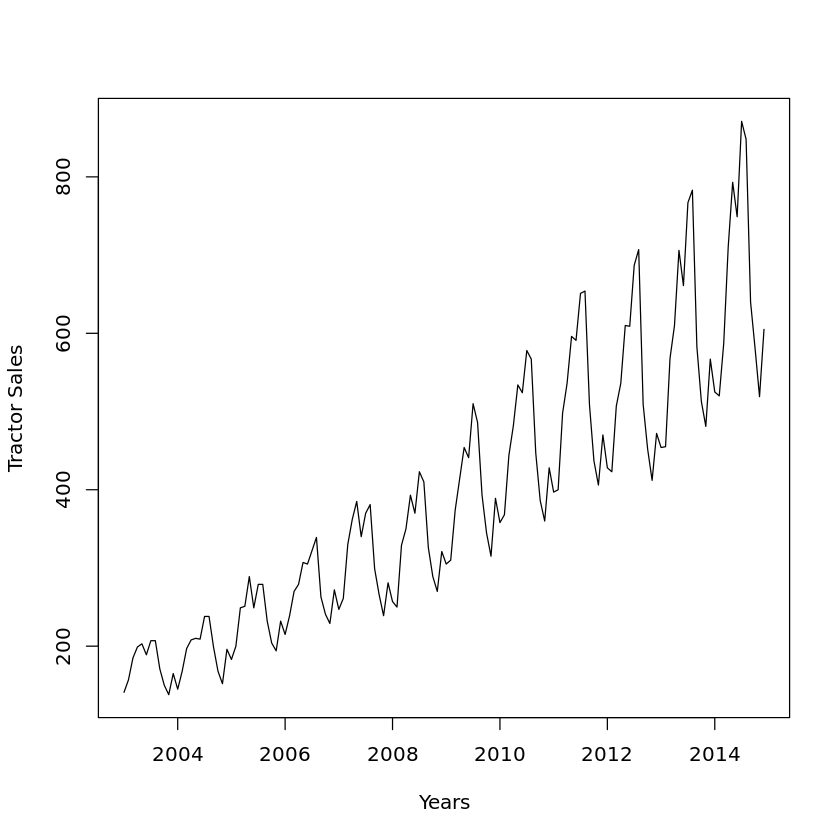

In [23]:
data = read.csv('Tractor-Sales.csv')
#data = read.csv('http://ucanalytics.com/blogs/wp-content/uploads/2015/06/Tractor-Sales.csv')

head(data,12)

# Convert the data into Time Series element 
data = ts(data[,2],start = c(2003,1),frequency = 12)

# Plot Tractors sold on a yearly time line 
plot(data, xlab='Years', ylab = 'Tractor Sales')


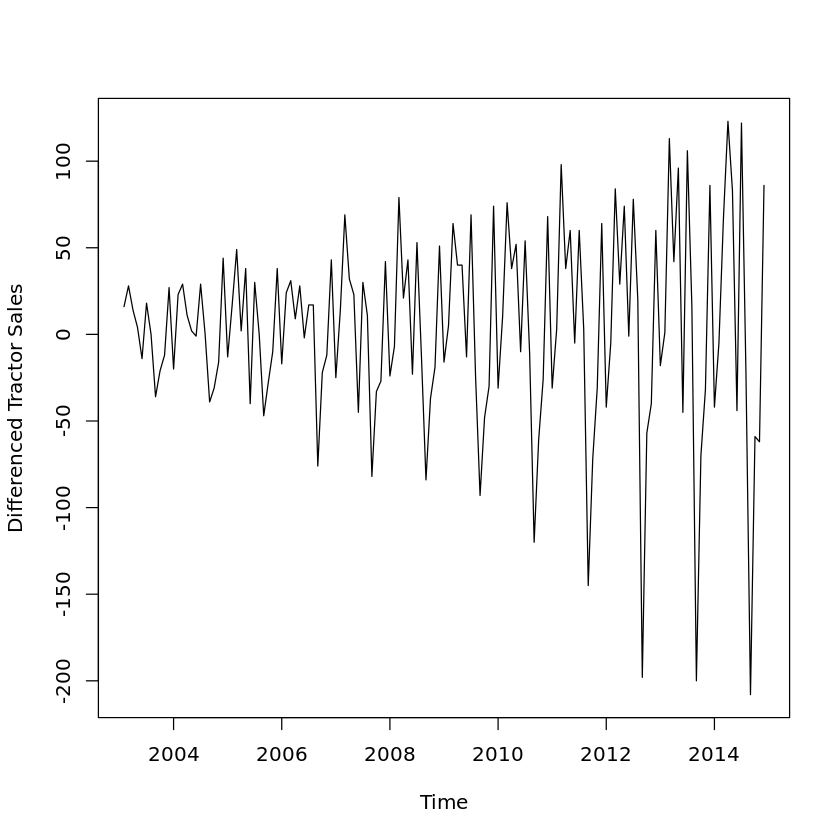

In [24]:
#############################################################################
# Step 2: Difference data to make data stationary on mean (remove trend)
#############################################################################
# The next thing to do is to make the series stationary . 
# This to remove the upward trend through 1st order differencing the series using the following formula:
  
#  1st Differencing (d=1)	 Y_{t}^{'}=Y_t -Y_{t-1} 

plot(diff(data),ylab='Differenced Tractor Sales')

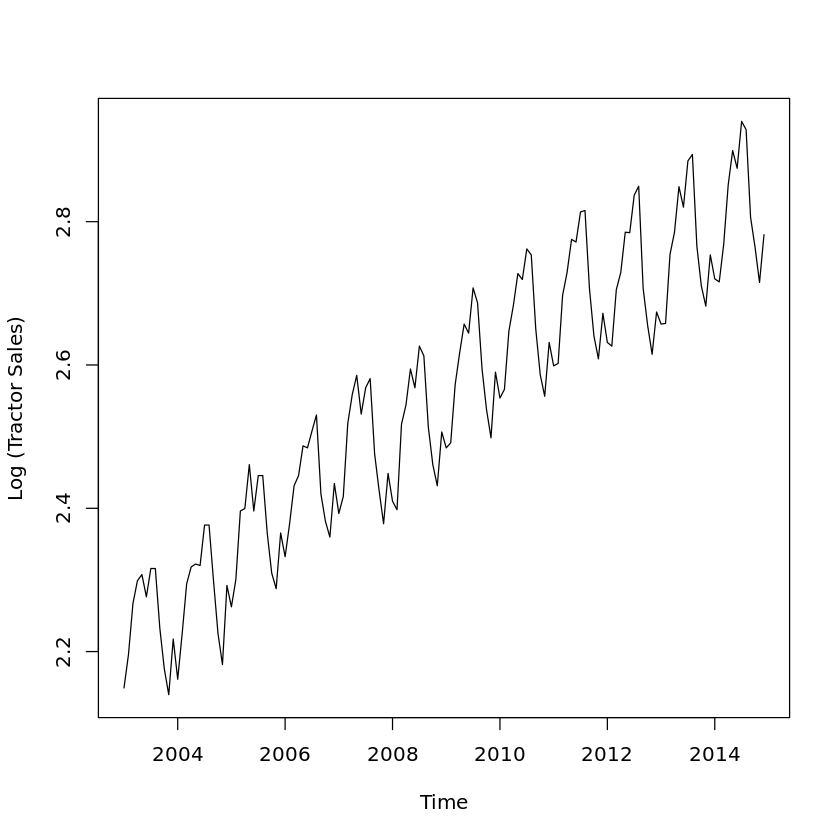

In [25]:
#############################################################################
# Step 3: log transform data to make data stationary on variance
#############################################################################
# Step 3: log transform data to make data stationary on variance
# One of the best ways to make a series stationary on variance is through transforming the original series through log transform
# Log of sales	 Y_{t}^{new}=log_{10}(Y_t) 

plot(log10(data),ylab='Log (Tractor Sales)')
# One of the best ways to make a series stationary on variance is through transforming the original series through log transform
# Log of sales	 Y_{t}^{new}=log_{10}(Y_t) 

plot(log10(data),ylab='Log (Tractor Sales)')

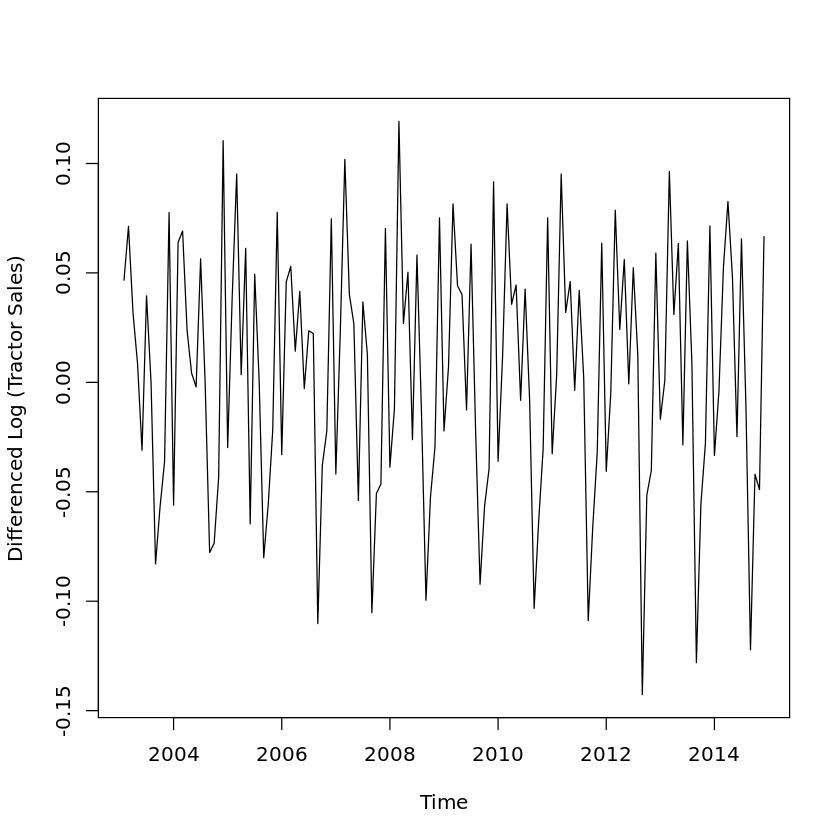

In [26]:
#############################################################################
#Step 4: Difference log transform data to make data stationary on both mean and variance
#############################################################################
# 1st Differencing (d=1) of log of sales	 Y_{t}^{new'}=log_{10}(Y_t) -log_{10}(Y_{t-1}) 

plot(diff(log10(data)),ylab='Differenced Log (Tractor Sales)')


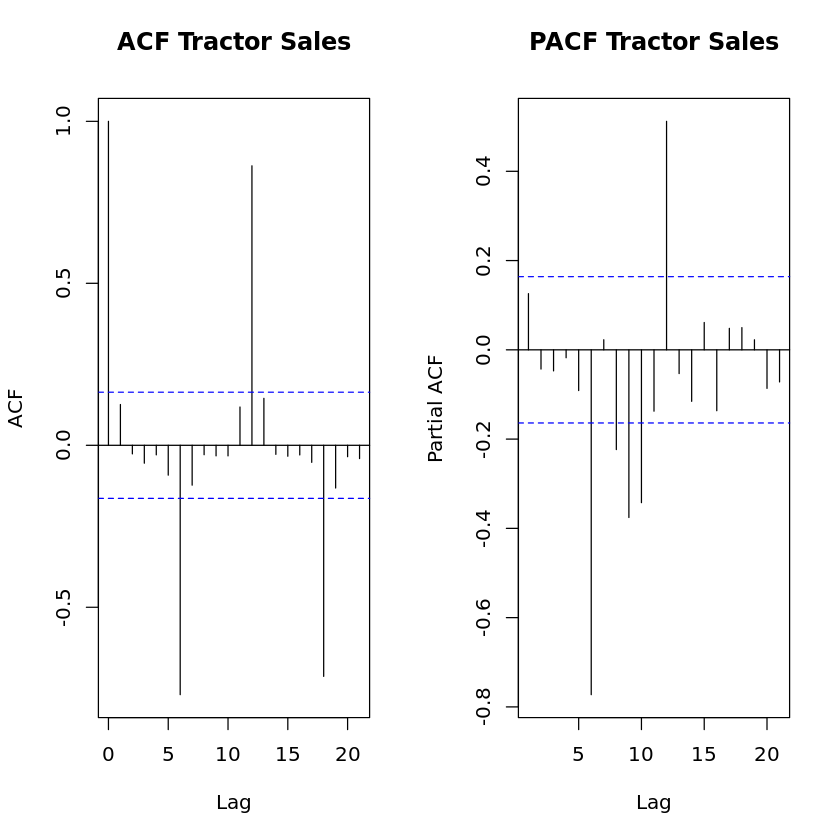

In [27]:
###############################################################################
# Step 5: Plot ACF and PACF to identify potential AR and MA model
#############################################################################

#Now, let us create autocorrelation factor (ACF) and partial autocorrelation factor (PACF) 
#plots to identify patterns in the above data which is stationary on both mean and variance. 
#The idea is to identify presence of AR and MA components in the residuals. 
#The following is the R code to produce ACF and PACF plots.


par(mfrow = c(1,2))
acf(ts(diff(log10(data))),main='ACF Tractor Sales')
pacf(ts(diff(log10(data))),main='PACF Tractor Sales')


In [28]:
# Since, there are enough spikes in the plots outside the insignificant zone (dotted horizontal lines) we can conclude that the residuals are not random. 
# This implies that there is juice or information available in residuals to be extracted by AR and MA models. 
# Also, there is a seasonal component available in the residuals at the lag 12 (represented by spikes at lag 12). 
# This makes sense since we are analyzing monthly data that tends to have seasonality of 12 months because of patterns in tractor sales.


In [29]:
# Step 6(A): Identification of best fit ARIMA model

ARIMAfit = auto.arima(log10(data), approximation=FALSE,trace=FALSE)
summary(ARIMAfit)

Series: log10(data) 
ARIMA(0,1,1)(0,1,1)[12] 

Coefficients:
          ma1     sma1
      -0.4047  -0.5529
s.e.   0.0885   0.0734

sigma^2 estimated as 0.0002571:  log likelihood=354.4
AIC=-702.79   AICc=-702.6   BIC=-694.17

Training set error measures:
                       ME       RMSE        MAE         MPE      MAPE      MASE
Training set 0.0002410698 0.01517695 0.01135312 0.008335713 0.4462212 0.2158968
                   ACF1
Training set 0.01062604


$pred
          Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
2015 2.754168 2.753182 2.826608 2.880192 2.932447 2.912372 2.972538 2.970585
          Sep      Oct      Nov      Dec
2015 2.847264 2.797259 2.757395 2.825125

$se
            Jan        Feb        Mar        Apr        May        Jun
2015 0.01603508 0.01866159 0.02096153 0.02303295 0.02493287 0.02669792
            Jul        Aug        Sep        Oct        Nov        Dec
2015 0.02835330 0.02991723 0.03140337 0.03282229 0.03418236 0.03549035


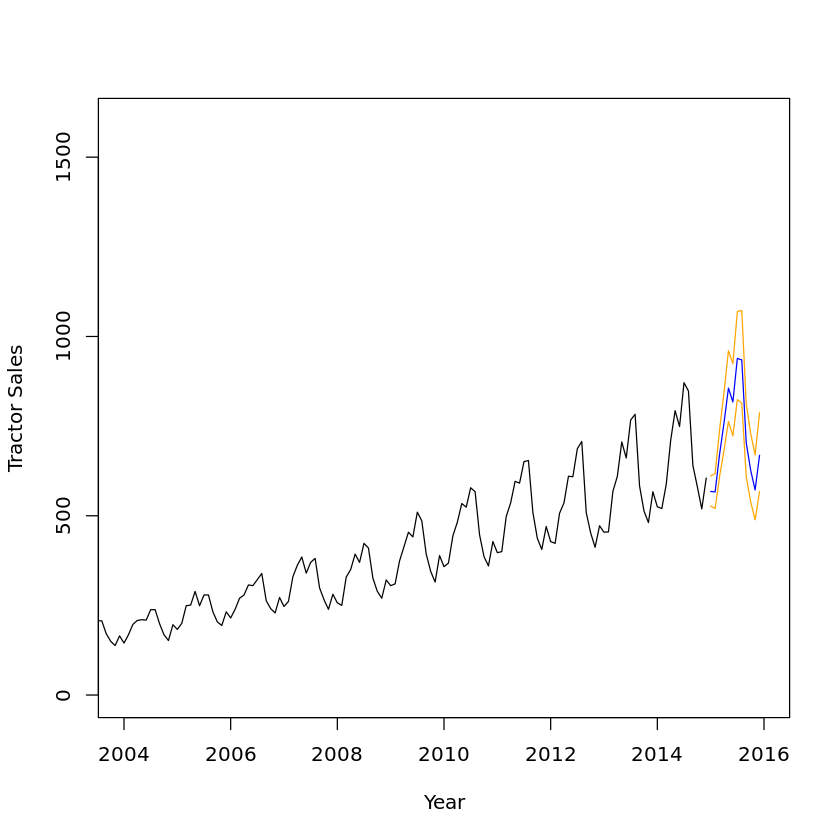

In [30]:
###############################################################
# Step 6(B): Forecast sales using the best fit ARIMA model
###############################################################
# The next step is to predict tractor sales for next 3 years 
# i.e. for 2015, 2016, and 2017 through the above model
par(mfrow = c(1,1))
pred = predict(ARIMAfit, n.ahead = 12)
pred
plot(data,type='l',xlim=c(2004,2016),ylim=c(1,1600),xlab = 'Year',ylab = 'Tractor Sales')
lines(10^(pred$pred),col='blue')
lines(10^(pred$pred+2*pred$se),col='orange')
lines(10^(pred$pred-2*pred$se),col='orange')

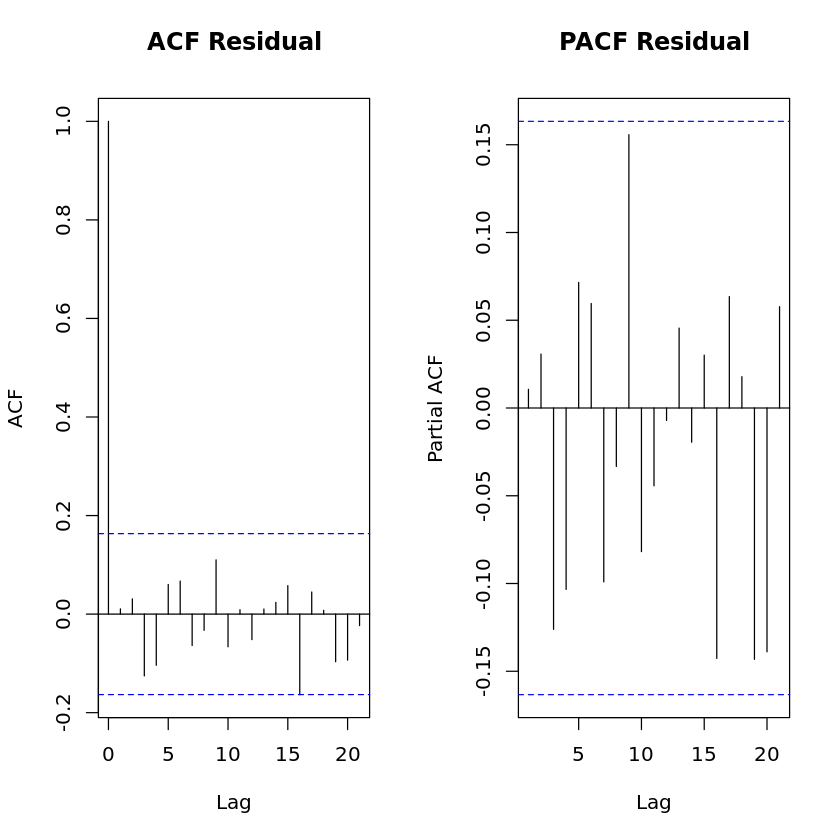

In [31]:
#################################################################################
# Step 7: Plot ACF and PACF for residuals of ARIMA model to ensure 
#################################################################################
# no more information is left for extraction
# let’s create an ACF and PACF plot of the residuals of our best fit ARIMA model i.e. ARIMA(0,1,1)(0,1,1)[12]. 

par(mfrow=c(1,2))
acf(ts(ARIMAfit$residuals),main='ACF Residual')
pacf(ts(ARIMAfit$residuals),main='PACF Residual')